In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import talib
import numpy as np
import lightgbm as lgb

In [125]:
#Step1 Get Original Data from Interactivebroker
filename = "SPY_20040123_20200529_30min.csv" #from IB
df = pd.read_csv(filename,index_col = 0)
# df.reset_index(drop=True,inplace=True)
print(df.shape)
print(df.head(1))
print(df.tail(1))

(54688, 7)
                        open     high      low    close  volume  average  \
date                                                                       
2004-01-23 08:30:00  115.015  115.155  114.895  115.005      -1     -1.0   

                     barCount  
date                           
2004-01-23 08:30:00        -1  
                       open    high      low    close  volume  average  \
date                                                                     
2020-05-29 14:30:00  303.63  304.96  303.315  304.025      -1     -1.0   

                     barCount  
date                           
2020-05-29 14:30:00        -1  


In [126]:
#Step2 check data

#Check NAN
print(df.isnull().values.any() )

# #check Outlier
# plt.style.use("ggplot")
# plt.rcParams["figure.figsize"]=(20,5)
# df.plot()

False


In [127]:
print( df.info() )
print(type(df.index[0]), df.index[0])
df.index = pd.to_datetime(df.index)
print( df.info() )
print(type(df.index[0]), df.index[0])

<class 'pandas.core.frame.DataFrame'>
Index: 54688 entries, 2004-01-23 08:30:00 to 2020-05-29 14:30:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      54688 non-null  float64
 1   high      54688 non-null  float64
 2   low       54688 non-null  float64
 3   close     54688 non-null  float64
 4   volume    54688 non-null  int64  
 5   average   54688 non-null  float64
 6   barCount  54688 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 3.3+ MB
None
<class 'str'> 2004-01-23 08:30:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54688 entries, 2004-01-23 08:30:00 to 2020-05-29 14:30:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      54688 non-null  float64
 1   high      54688 non-null  float64
 2   low       54688 non-null  float64
 3   close     54688 non-null  float64
 4   volume    54688 non-null  int64  
 5   ave

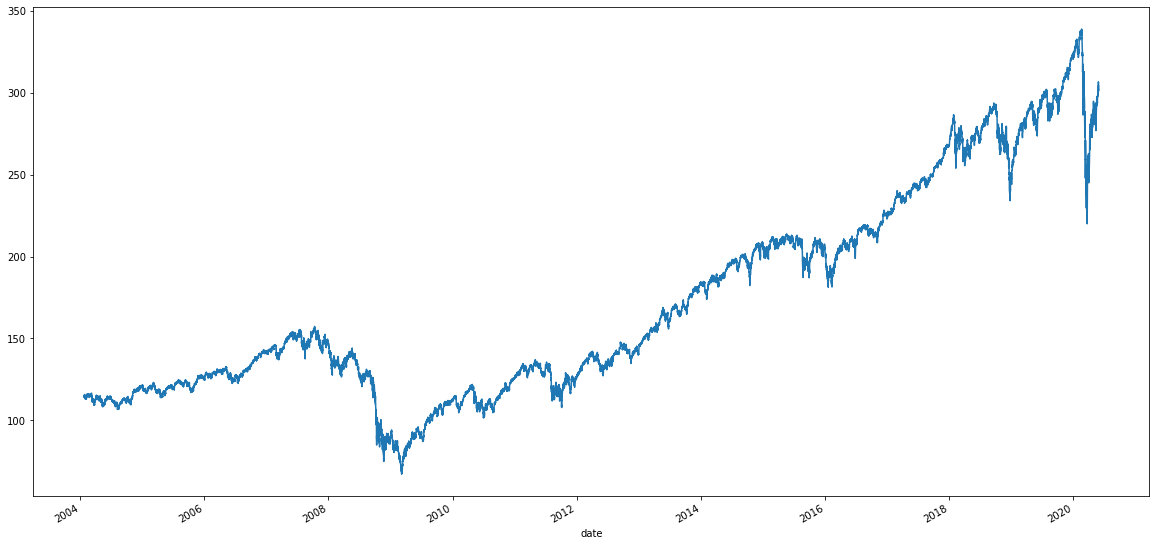

In [128]:
#Step Clean Data
tc=df.close #targetclose
plt.rcParams["figure.figsize"] = (20,10)
tc.plot()

In [129]:
sma = talib.SMA(tc, timeperiod=120)
wma = talib.WMA(tc, timeperiod=120)
mom = talib.MOM(tc, timeperiod=120)
k, d = talib.STOCH  (tc, tc, tc, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(tc, tc, tc, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(tc, tc, tc, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(tc, tc, tc, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(tc, tc, tc, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(tc, tc, tc, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(tc, tc, tc, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (tc, timeperiod=120)
rsi2 = talib.RSI(tc, timeperiod=240)
rsi3 = talib.RSI(tc, timeperiod=480)
rsi4 = talib.RSI(tc, timeperiod=640)
rsi5 = talib.RSI(tc, timeperiod=720)
rsi6 = talib.RSI(tc, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(tc, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(tc, tc, tc, timeperiod=120)
cci = talib.CCI(tc, tc, tc, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (tc.rolling(5).mean()   / tc),
    'a10':  (tc.rolling(10).mean()  / tc),
    'a20':  (tc.rolling(20).mean()  / tc),
    'a40':  (tc.rolling(40).mean()  / tc),
    'a80':  (tc.rolling(80).mean()  / tc),
    'a160': (tc.rolling(160).mean() / tc),
    'a320': (tc.rolling(320).mean() / tc),
    'a640': (tc.rolling(640).mean() / tc),
    'a720': (tc.rolling(720).mean() / tc),
    'a840': (tc.rolling(840).mean() / tc),
    'a960': (tc.rolling(960).mean() / tc),
    'a1024':(tc.rolling(1024).mean() / tc),
    'b1': tc/tc.shift(50),
    'b2': tc/tc.shift(100),
    'b3': tc/tc.shift(150),
    'b4': tc/tc.shift(200),
    'b5': tc/tc.shift(250),
    'b6': tc/tc.shift(300),
    'b7': tc/tc.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(tc, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(tc, 120),

    'ADXR0': talib.ADXR(tc, tc, tc, 60),
    'ADXR1': talib.ADXR(tc, tc, tc, 120),
    'ADXR2': talib.ADXR(tc, tc, tc, 240),
    'ADXR3': talib.ADXR(tc, tc, tc, 360),
    'ADXR4': talib.ADXR(tc, tc, tc, 480),
    'ADXR5': talib.ADXR(tc, tc, tc, 640),

    'return': tc.shift(-10)/tc, # > tc,
})

feature_names = list(dataset.columns[:-1])

In [130]:
print(feature_names)

['RSIb', 'RSIb2', 'RSIb3', 'RSIb4', 'RSIb5', 'RSIb6', 'MOMb', 'KDb', 'KDb2', 'KDb3', 'KDb4', 'KDb5', 'KDb6', 'KDb7', 'KDb8', 'a5', 'a10', 'a20', 'a40', 'a80', 'a160', 'a320', 'a640', 'a720', 'a840', 'a960', 'a1024', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'LINEARREG_SLOPE0', 'LINEARREG_SLOPE1', 'ADXR0', 'ADXR1', 'ADXR2', 'ADXR3', 'ADXR4', 'ADXR5']


In [131]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (54688, 43)
after dropping NaN (52760, 43)


In [132]:
# print(dataset.tail(2))
print( 2004+(20-4)*0.8)
print( dataset[:'2015'].tail(1) )
print( " ------------------------------------------------------------------------------------------------------- ")
print(dataset['2016':].head(1) )

2016.8
                         RSIb     RSIb2     RSIb3     RSIb4    RSIb5  \
date                                                                   
2015-12-31 14:30:00  0.962596  0.980322  0.993542  0.995614  0.99614   

                        RSIb6  MOMb        KDb      KDb2     KDb3  ...  \
date                                                               ...   
2015-12-31 14:30:00  0.996722 -1.87  16.958256  5.600668 -7.69456  ...   

                           b7  LINEARREG_SLOPE0  LINEARREG_SLOPE1     ADXR0  \
date                                                                          
2015-12-31 14:30:00  0.971789          0.001511          0.037501  7.481126   

                        ADXR1     ADXR2     ADXR3     ADXR4     ADXR5  \
date                                                                    
2015-12-31 14:30:00  4.751926  4.102653  3.138122  2.656559  2.179414   

                       return  
date                           
2015-12-31 14:30:00  0.980336  

In [133]:
dataset_train = dataset[:'2016']
dataset_test = dataset['2016':]

train = dataset_train[feature_names], dataset_train['return']
test = dataset_test[feature_names], dataset_test['return']

# gbm = lgb.LGBMClassifier(n_estimators=1000, random_state=5, learning_rate=0.05)

gbm = lgb.LGBMRegressor(n_estimators=1000, random_state=5, learning_rate=0.05)

gbm.fit(*train)
gbm.score(*test)

-0.955959844765937

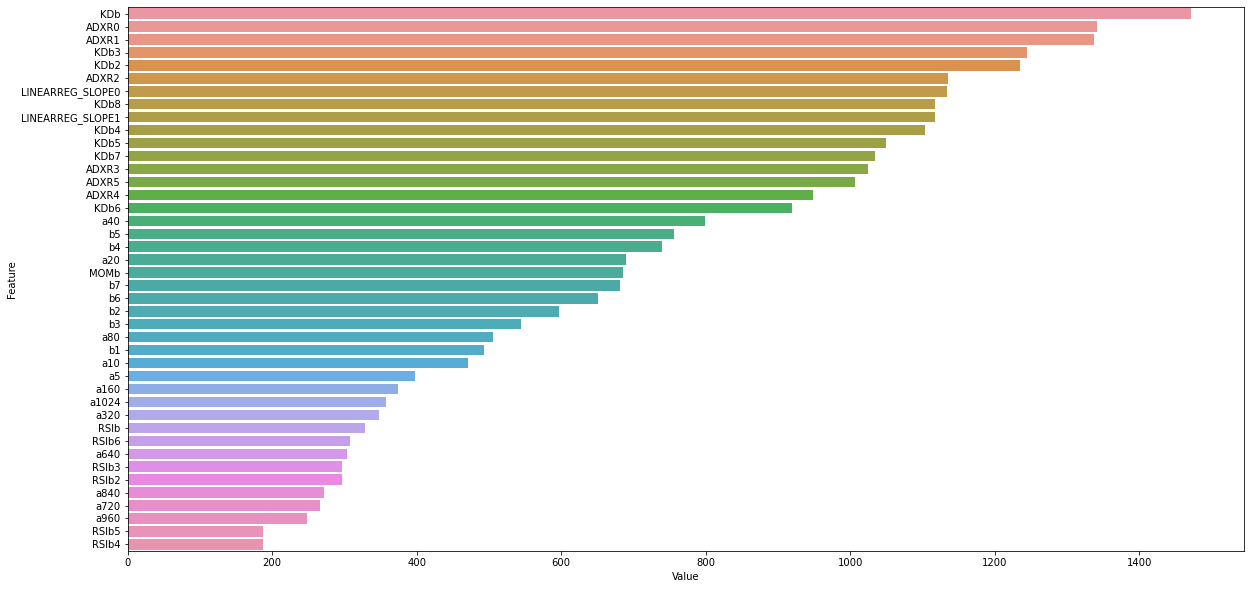

In [134]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,feature_names)), columns=['Value','Feature'])
feature_imp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

## back test

In [135]:
ey = gbm.predict(dataset[feature_names])
print(ey)

ey = pd.Series(ey, index=dataset.index)
print(type(ey),ey.shape)
print(ey)

[1.00438099 1.00731962 1.00774481 ... 0.9907939  0.99063116 0.99018132]
<class 'pandas.core.series.Series'> (52760,)
date
2004-08-13 09:30:00    1.004381
2004-08-13 10:00:00    1.007320
2004-08-13 10:30:00    1.007745
2004-08-13 11:00:00    1.009970
2004-08-13 11:30:00    1.010197
                         ...   
2020-05-28 14:00:00    0.990450
2020-05-28 14:30:00    0.990630
2020-05-29 08:30:00    0.990794
2020-05-29 09:00:00    0.990631
2020-05-29 09:30:00    0.990181
Length: 52760, dtype: float64


signa[2016:]  True     12645
False     1708
dtype: int64
14353 date
2016-01-04 08:30:00   -0.375
2016-01-04 09:00:00   -1.075
2016-01-04 09:30:00   -1.075
2016-01-04 10:00:00   -0.835
2016-01-04 10:30:00   -0.855
Name: close, dtype: float64
14353 date
2016-01-04 08:30:00   -0.375
2016-01-04 09:00:00   -1.075
2016-01-04 09:30:00   -1.075
2016-01-04 10:00:00   -0.835
2016-01-04 10:30:00   -0.855
Name: close, dtype: float64


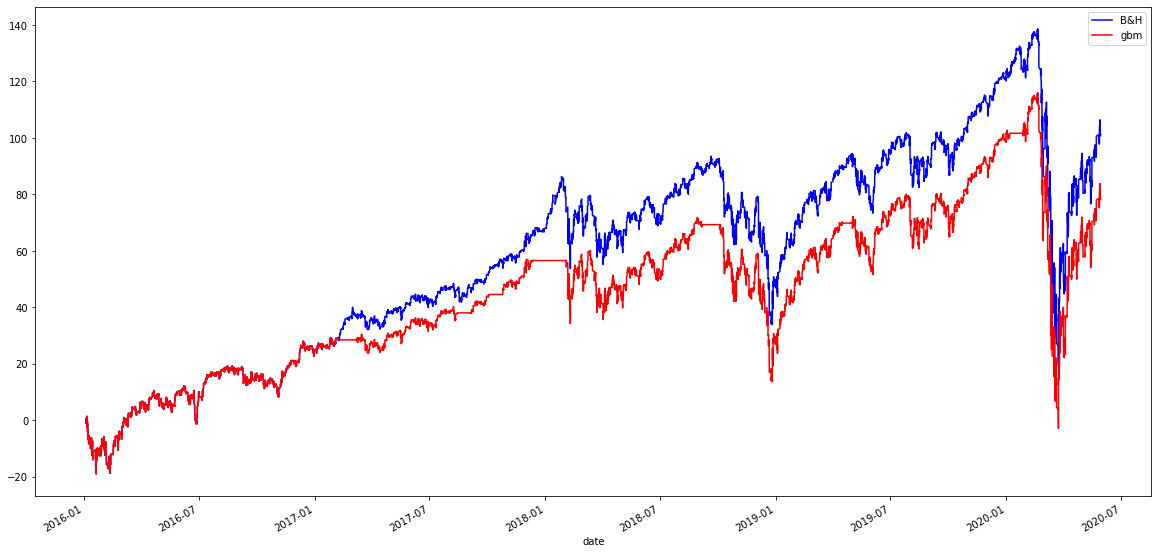

In [136]:

eq = tc[dataset.index]
gain = ((eq.shift(-1) - eq))
# print("gain: ",gain)
benchmark = gain["2016":].cumsum()

# signal = (ey > ey.quantile(0.7)).rolling(215).sum() > 0
# signal = (ey.rolling(90).sum() > 0)

signal = (ey > ey.quantile(0.7)).rolling(215).sum() > 0


print("signa[2016:] ", signal['2016':].value_counts() )
gain[signal==False]=0
eq = (gain['2016':]).cumsum()

plt.rcParams["figure.figsize"] = (20,10)
benchmark.plot(c="blue",label="B&H")
print(len(benchmark),benchmark.head())
eq.plot(c="red",label="gbm")
print(len(eq),benchmark.head() )
plt.legend(loc='best')
plt.show()

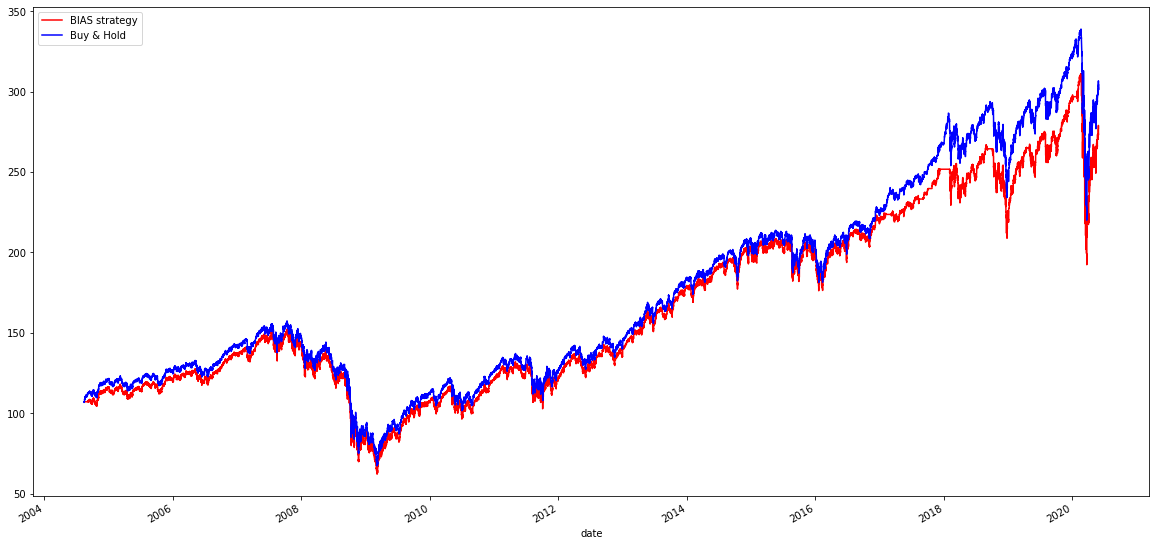

eqpc date
2004-08-13 10:00:00    0.0
2004-08-13 10:30:00    0.0
Name: close, dtype: float64


Start date,2004-08-13
End date,2020-05-29
Total months,2512
,Backtest
Annual return,0.448%
Cumulative returns,155.215%
Annual volatility,5.234%
Sharpe ratio,0.11
Calmar ratio,0.01
Stability,0.73
Max drawdown,-59.22%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,59.22,2007-10-11,2009-03-06,2013-04-09,1434
1,38.20,2020-02-19,2020-03-23,NaT,NaN
2,21.78,2018-08-29,2018-12-26,2019-05-03,177
3,15.57,2015-05-20,2016-01-20,2016-07-11,298
4,11.90,2007-07-16,2007-08-16,2007-10-05,60


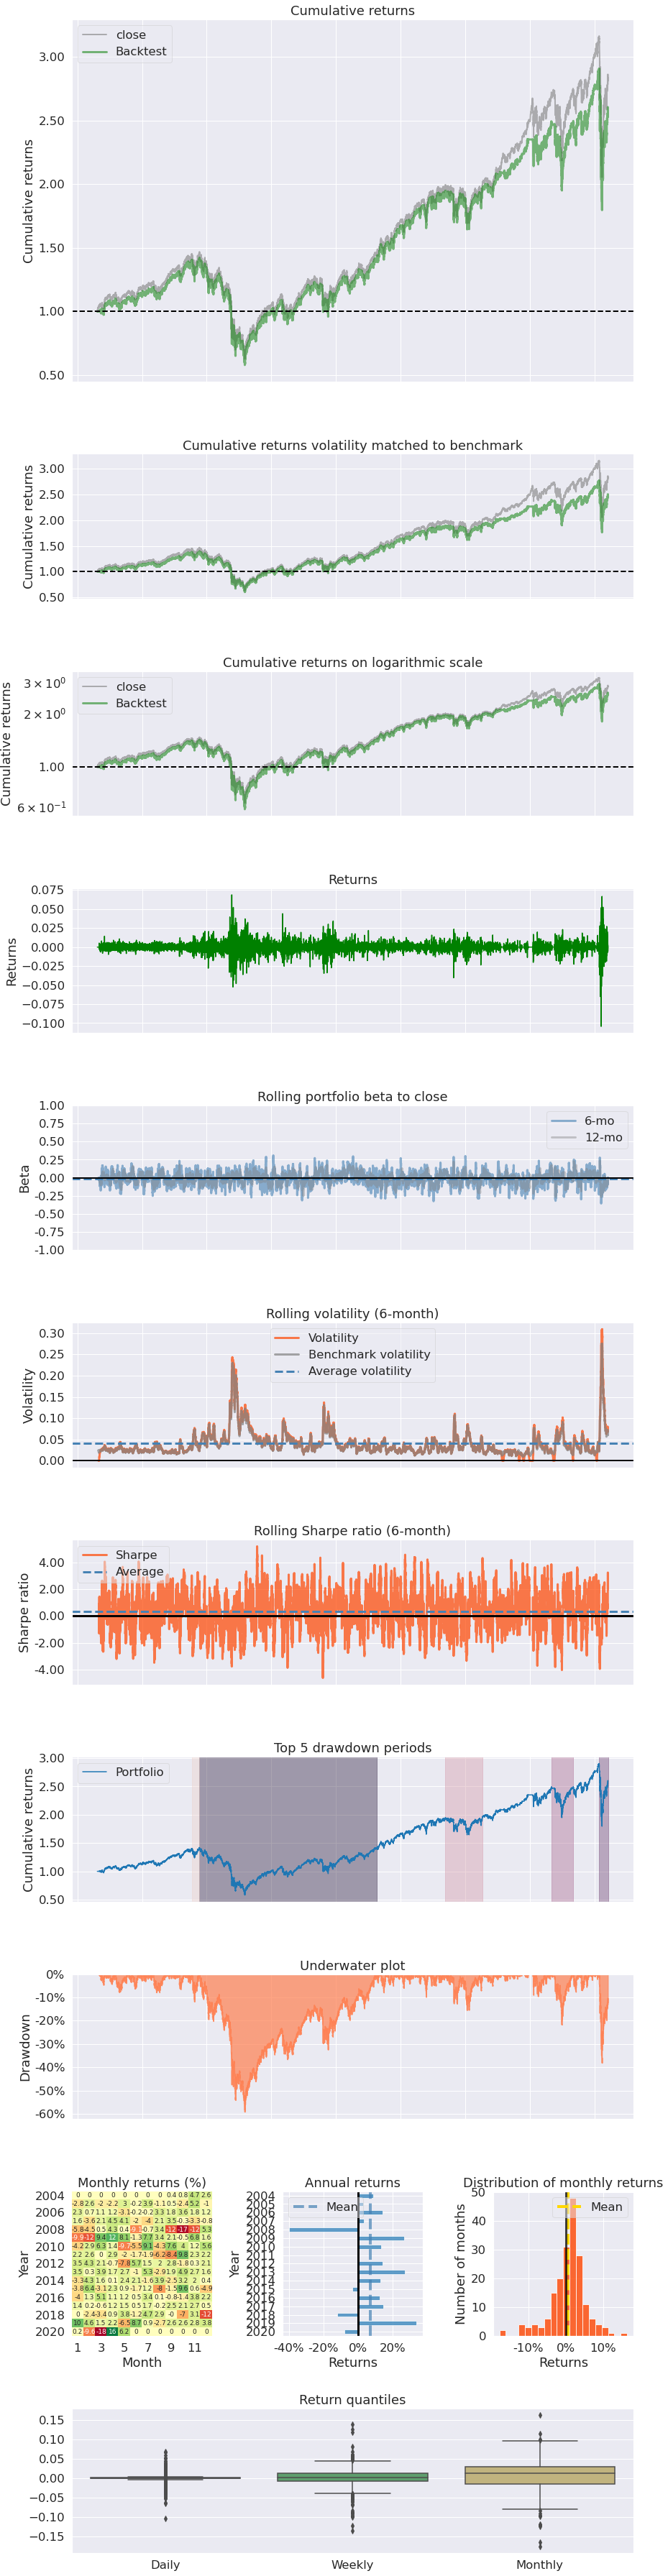

In [137]:
#Pyfolio
import pyfolio as pf
eq = tc[dataset.index]
gain = ((eq.shift(-1) - eq))
signal = (ey > ey.quantile(0.7)).rolling(215).sum() > 0
gain[signal==False]=0
creturn = gain.cumsum()
eq=creturn
# returns = tc.shift(-1)-tc
# returns[hold == 0] = 0
# creturn = returns.cumsum()
# eq=creturn



eq_relative = eq + tc[tc.index == eq.index[0]][0]
bm_relative = tc[eq.index[0]:]

eq_relative.plot(c="red",  label="GBM strategy")
bm_relative.plot(c="blue", label="Buy & Hold" )
        
plt.legend(loc='best')
plt.show()

eqpc = eq_relative.pct_change()
print("eqpc", eqpc[1:].head(2))
        
bmpc = bm_relative[1:].pct_change()
        
pf.create_returns_tear_sheet( eqpc[1:], benchmark_rets=bmpc[1:] )  #relative sharpe 0.5
    

In [138]:
def bt(bars):
    signal = (ey > ey.quantile(0.95)).rolling(bars).sum() > 0
    eq = (gain[signal]['2016':]).cumsum()
#     print(eq[-1])
    return eq[-1]
print( bt(90) )

56.61999999999995


In [101]:
rmax=0
for i in range (10,1000,10):
    ans = bt(i)
    if ans > rmax:
        print(i,": ",ans)
        rmax=ans


70 :  5.375000000000057
80 :  9.160000000000082
90 :  17.234999999999985


## Model Interpretation


In [102]:
#Recall and Precision


In [105]:
 ey['2016':]

date
2016-01-04 08:30:00    0.994106
2016-01-04 09:00:00    0.994414
2016-01-04 09:30:00    0.995960
2016-01-04 10:00:00    0.997104
2016-01-04 10:30:00    0.994389
                         ...   
2020-05-28 14:00:00    0.987895
2020-05-28 14:30:00    0.989848
2020-05-29 08:30:00    0.992602
2020-05-29 09:00:00    0.992349
2020-05-29 09:30:00    0.991089
Length: 14353, dtype: float64

In [106]:
dataset['return']['2016':]

date
2016-01-04 08:30:00    0.996878
2016-01-04 09:00:00    0.996798
2016-01-04 09:30:00    1.009290
2016-01-04 10:00:00    1.008888
2016-01-04 10:30:00    1.005316
                         ...   
2020-05-28 14:00:00    0.989226
2020-05-28 14:30:00    0.999604
2020-05-29 08:30:00    1.004401
2020-05-29 09:00:00    1.006898
2020-05-29 09:30:00    1.009966
Name: return, Length: 14353, dtype: float64

In [103]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(dataset['return']['2016':], ey['2016':])

pd.DataFrame({
    'precisions':precisions[:-1],
    'recalls':recalls[:-1],
}, index=thresholds).plot()
#

ValueError: continuous format is not supported

In [104]:
#ROC Curve


In [107]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dataset['return']['2016':], ey['2016':])

print(fpr.shape)
print(tpr.shape)
print(thresholds.shape)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

ValueError: continuous format is not supported

In [ ]:
#traditional strategy KD

In [ ]:
def backtest(k1, k2, plot=False):
    
    k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=tc.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = tc.shift(-1) - tc
    
    returns[hold==-1]=0
    
    if plot:
        (tc-tc[0])[:'2015'].plot(c='blue',label="Buy & Hold")
#         returns[hold == 1][:'2015'].cumsum().plot(c="red", label="Bias")
        returns[:'2015'].cumsum().plot(c="red", label="Bias")
        plt.legend(loc='best')
        plt.show()
    
        
    
    return returns[hold == 1][:'2015'].cumsum().iloc[-1]
   



In [ ]:
maxr = 0
for k1 in range(40, 100, 1):
    for k2 in range(40, 100, 1):
        if k1 <= k2:
            continue
        r = backtest(k1, k2)
        if r > maxr:
            print(r, k1, k2)
            maxr = r

In [ ]:
backtest(88, 40, True)

In [ ]:
def backtest2(k1, k2, plot=False):

    k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=tc.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = tc.shift(-1) - tc
    
    returns[hold==-1]=0
    
    if plot:
        temp=tc['2015':]
        (temp-temp[0]).plot(c='blue',label="Buy & Hold")
#         returns[hold == 1][:'2015'].cumsum().plot(c="red", label="Bias")
        returns['2015':].cumsum().plot(c="red", label="Bias")
        plt.legend(loc='best')
        plt.show()
    
        
    
    return returns[hold == 1][:'2015'].cumsum().iloc[-1]
   

In [ ]:
backtest2(88, 40, True)